In [1]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Cargar directorio y csv
os.chdir ('c:\\Users\\polga\\.vscode\\samplerepo\\Proyecto_final\\datos')
df = pd.read_csv("diabetes_prediction.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Mostrar valores nulos
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
# Ver dimension del df
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Redondear a 2 los decimales
df.describe().round(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.08
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [7]:
# Cambiar tipos de datos
df['age'] = df['age'].astype(int)
df['blood_glucose_level'] = df['blood_glucose_level'].astype(float)

In [8]:
# Recuento del numero por categoria
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

C:\Users\polga\AppData\Local\Temp\ipykernel_25004\531520486.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\polga\AppData\Local\Temp\ipykernel_25004\531520486.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\polga\AppData\Local\Temp\ipykernel_25004\531520486.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


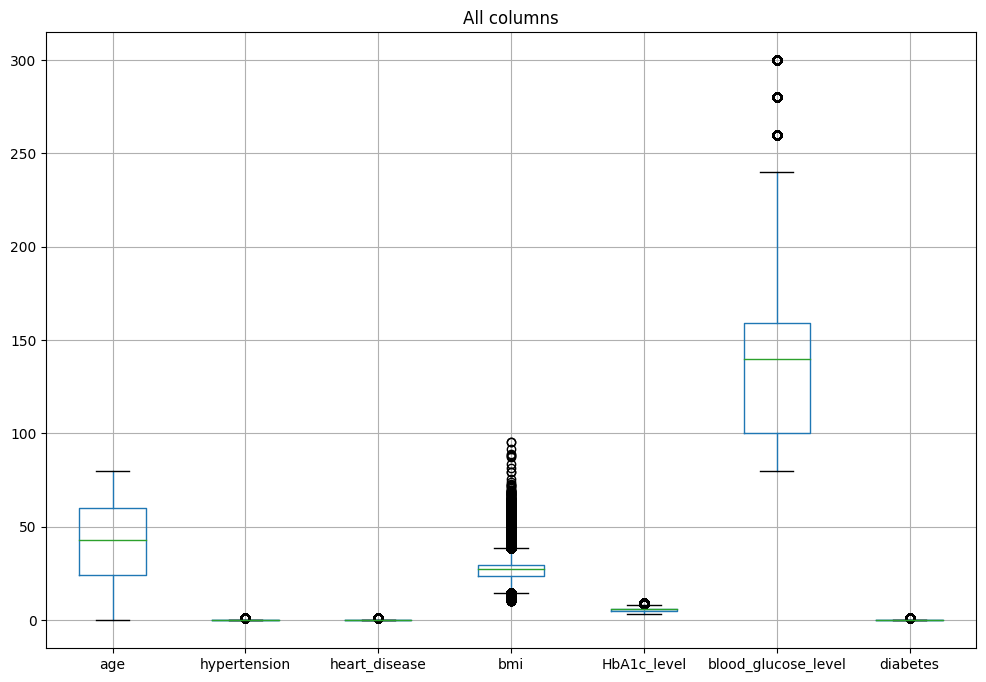

In [9]:
# Ver outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Boxplot de todas las variables
plt.figure(figsize=(12, 8))
df.boxplot(column=['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'])
plt.title("All columns")
plt.show()

### Visualización y analisis de datos

In [10]:
num_gender = df['gender'].value_counts()
num_gender

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

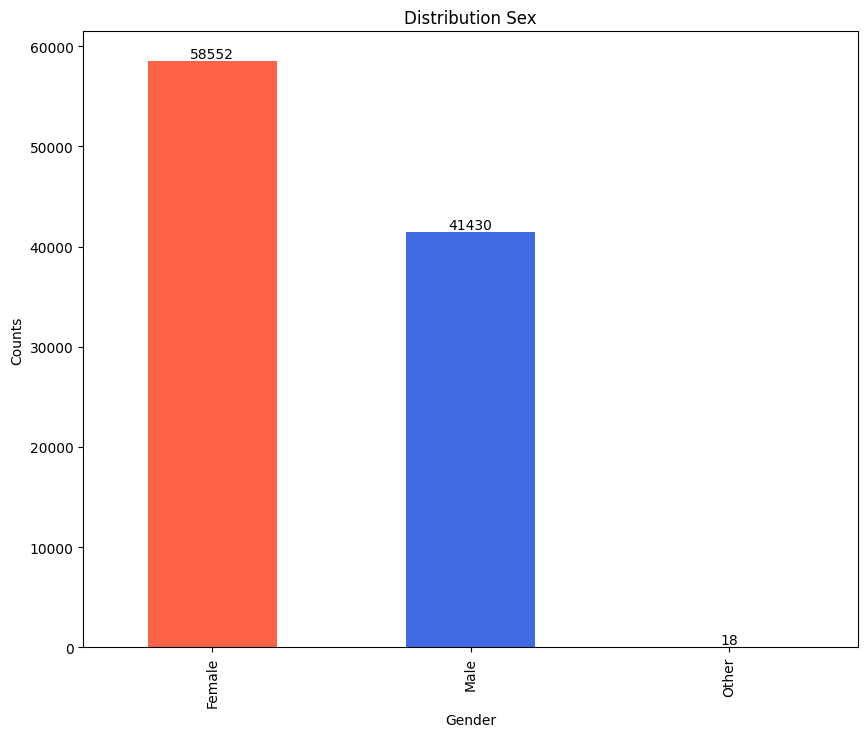

In [11]:
# Grafica distribucion del genero
num_gender.plot.bar(figsize=(10, 8), color=['tomato', 'royalblue', 'green'])

for i, v in enumerate(num_gender):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title("Distribution Sex")
plt.ylabel('Counts')
plt.xlabel('Gender')
plt.show()

In [12]:
num_age=df['age'].value_counts()
num_age

80    5621
51    1619
47    1574
48    1568
53    1542
      ... 
76     733
77     730
75     721
78     682
79     621
Name: age, Length: 81, dtype: int64

Text(0.5, 0, 'Years')

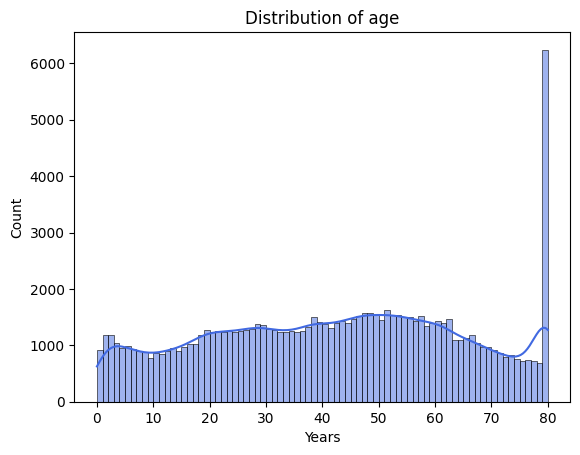

In [13]:
# Histplot de distribución de edad
sns.histplot(df['age'],kde=True,bins=80, color='royalblue')
plt.title('Distribution of age')
plt.xlabel('Years')

In [14]:
num_hypertens = df['hypertension'].value_counts()
num_hypertens

0    92515
1     7485
Name: hypertension, dtype: int64

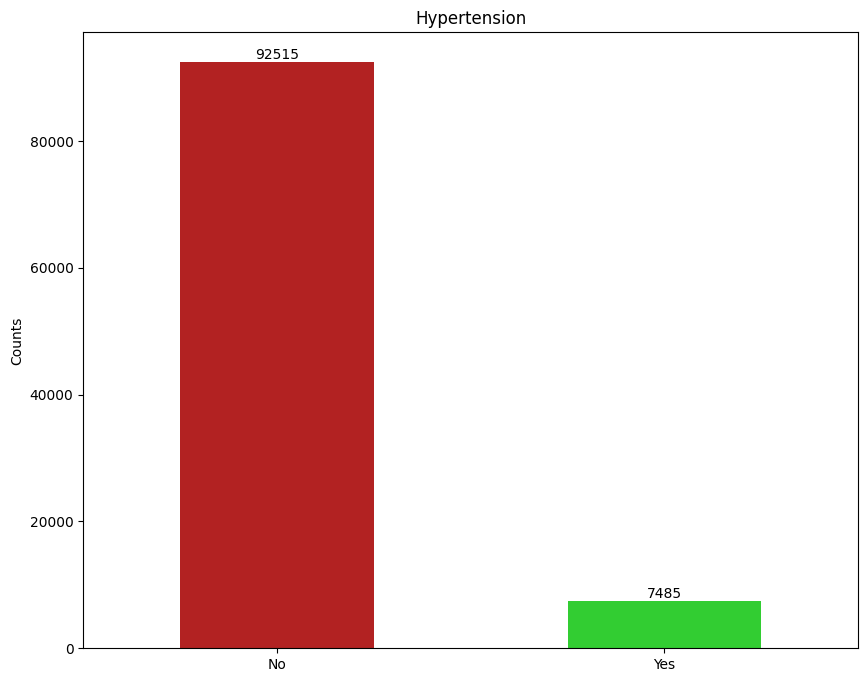

In [15]:
# Grafica hipertensión
num_hypertens.plot.bar(figsize=(10, 8), color=['firebrick','limegreen'])
eje_x = ['No', 'Yes']
for i, x in enumerate(num_hypertens):
    plt.text(i, x, str(x), ha='center', va='bottom')

plt.title("Hypertension")
plt.ylabel('Counts')
plt.xticks(range(len(num_hypertens.index)), eje_x, rotation= 0)
plt.show()

In [16]:
num_heart = df['heart_disease'].value_counts()
num_heart

0    96058
1     3942
Name: heart_disease, dtype: int64

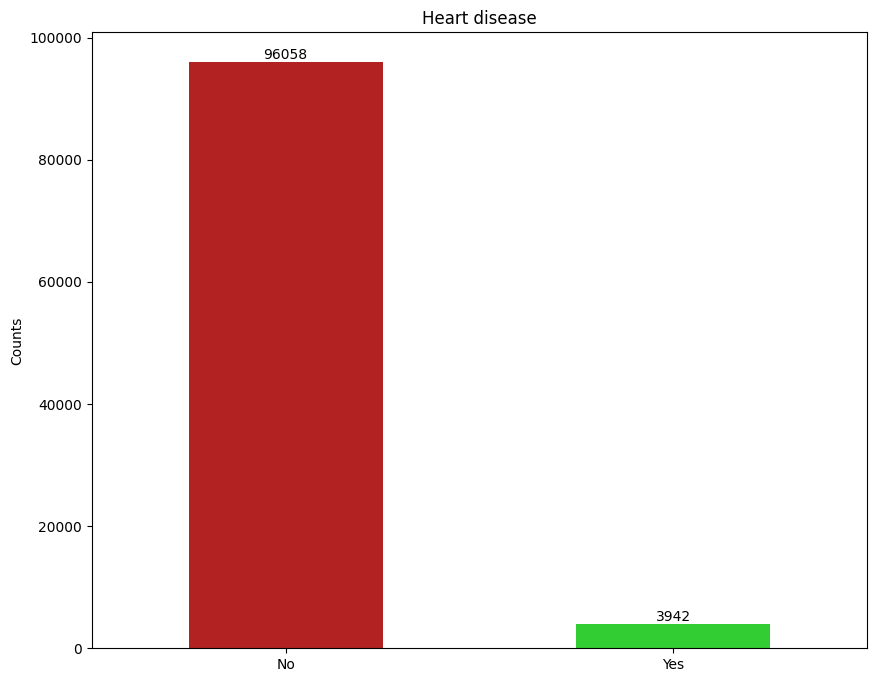

In [17]:
# Grafica enfermedad cardiaca
num_heart.plot.bar(figsize=(10, 8), color=['firebrick','limegreen'])
eje_x = ['No', 'Yes']
for j, z in enumerate(num_heart):
    plt.text(j, z, str(z), ha='center', va='bottom')

plt.title("Heart disease")
plt.ylabel('Counts')
plt.xticks(range(len(num_heart.index)), eje_x, rotation= 0)
plt.show()

In [18]:
num_diabetes = df['diabetes'].value_counts()
num_diabetes

0    91500
1     8500
Name: diabetes, dtype: int64

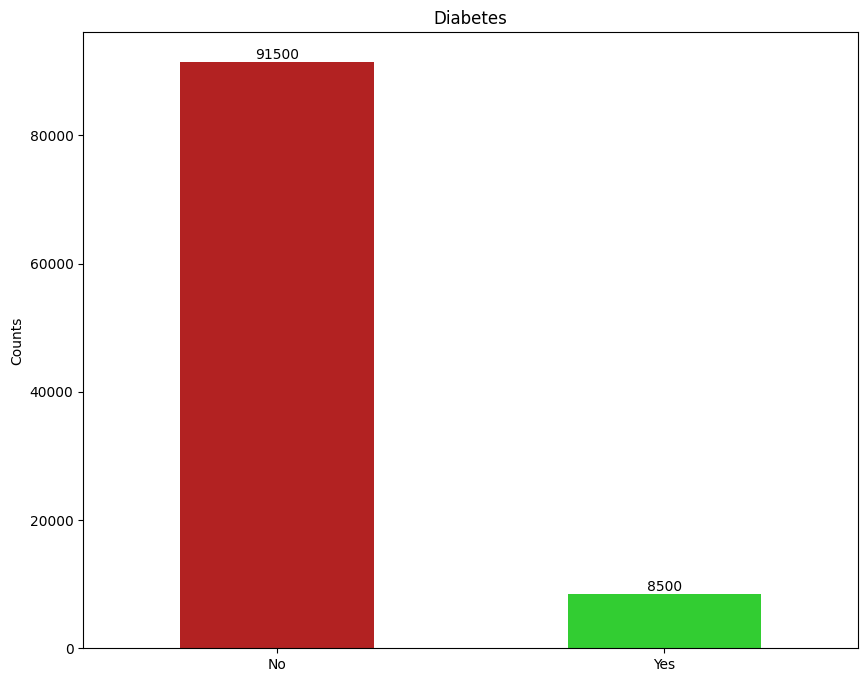

In [19]:
# Grafica diabetes
num_diabetes.plot.bar(figsize=(10, 8), color=['firebrick','limegreen'])
eje_x = ['No', 'Yes']
for i, x in enumerate(num_diabetes):
    plt.text(i, x, str(x), ha='center', va='bottom')

plt.title("Diabetes")
plt.ylabel('Counts')
plt.xticks(range(len(num_diabetes.index)), eje_x, rotation= 0)
plt.show()

In [20]:
num_smoking = df['smoking_history'].value_counts()
num_smoking

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

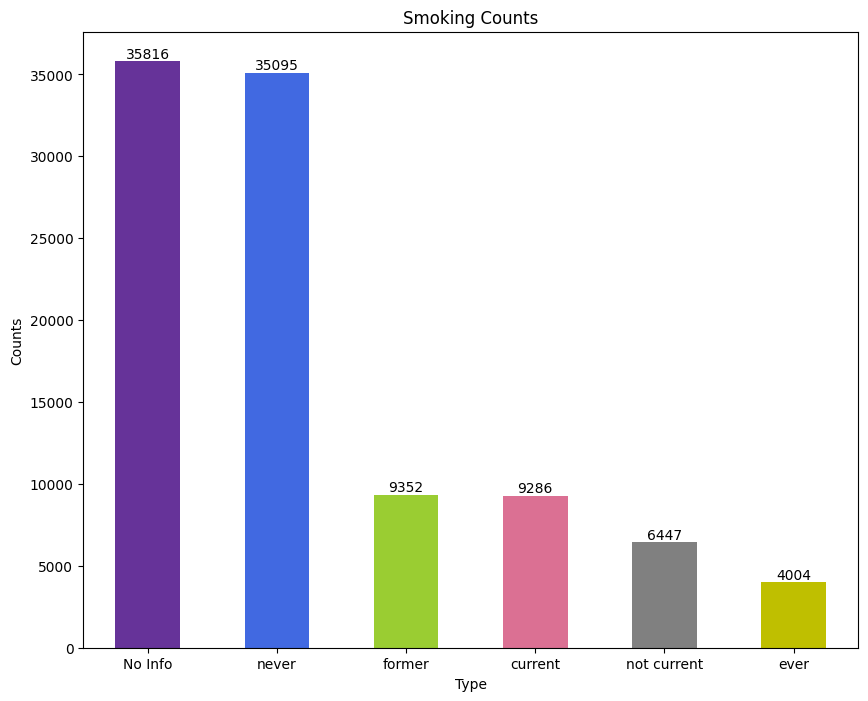

In [21]:
# grafica historial fumador
num_smoking.plot.bar(figsize=(10, 8), color=['rebeccapurple', 'royalblue', 'yellowgreen', 'palevioletred', 'gray', 'y'])
for i, x in enumerate(num_smoking):
    plt.text(i, x, str(x), ha='center', va='bottom')

plt.title("Smoking Counts")
plt.ylabel('Counts')
plt.xlabel('Type')
plt.xticks(rotation= 0)
plt.show()

En la siguiente tabla se presentan las categorías de nivel de peso estándar asociadas a los rangos del IMC de adultos:
- -18.5	        Bajo peso
- 18.5 – 24.9	Normal
- 25.0 – 29.9	Sobrepeso
- 30.0 o más	Obesidad

Text(0.5, 0, 'Values')

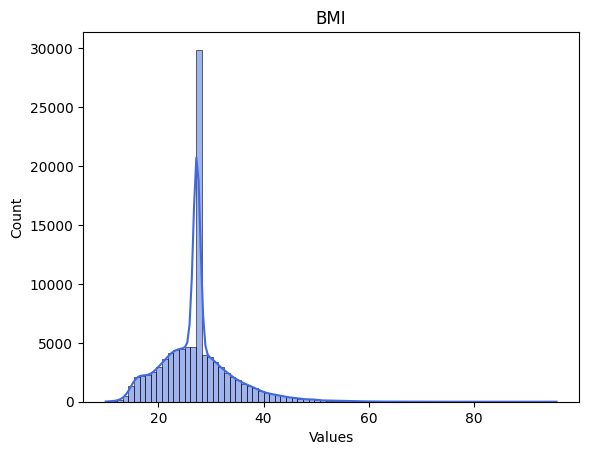

In [22]:
# Histplot bmi
sns.histplot(df['bmi'],kde=True,bins=80, color='royalblue')
plt.title('BMI')
plt.xlabel('Values')

HbA1c = hemoglobina glicosilada,  proporción de hemoglobina que se una a la glucosa. Refleja los niveles medios de glucemia (glucosa en sangre) en los últimos 3 meses.
Un nivel de HbA1c normal es menor al 5,7%
La prediabetes se ubica entre 5,7 a 6,4%. Tener prediabetes es un factor de riesgo para desarrollar diabetes tipo 2. Las personas con prediabetes pueden necesitar repetir las pruebas cada año
La diabetes tipo 2 se ubica por encima del 6,5%

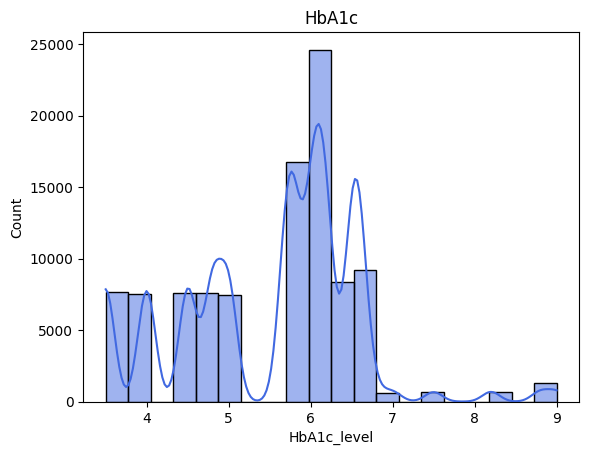

In [23]:
# Histpot HbA1c
sns.histplot(df['HbA1c_level'], kde=True,bins=20, color='royalblue')
plt.title('HbA1c')
plt.show()

El nivel de glucosa en sangre normal seria estar por debajo de 200mg/dl o 108mg/dl en ayunas

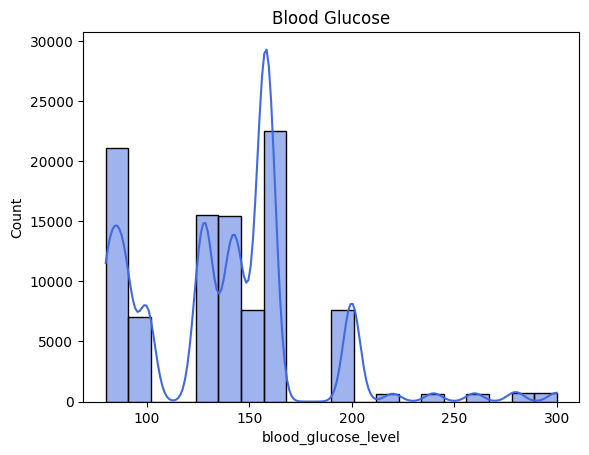

In [24]:
# Histplot blood glucose
sns.histplot(df['blood_glucose_level'], kde=True,bins=20, color='royalblue')
plt.title('Blood Glucose')
plt.show()

In [25]:
# Agrupamos para ver como influye segun tienes diabtes o no en las otras variables
diabetes_group = df.groupby(['diabetes']).mean().round(2)
diabetes_group

C:\Users\polga\AppData\Local\Temp\ipykernel_15896\2841503437.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diabetes_group = df.groupby(['diabetes']).mean().round(2)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.10,0.06,0.03,26.89,5.40,132.85
1,60.95,0.25,0.15,31.99,6.93,194.09


In [26]:
df.corr()

C:\Users\polga\AppData\Local\Temp\ipykernel_15896\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


C:\Users\polga\AppData\Local\Temp\ipykernel_15896\3997901759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<Axes: >

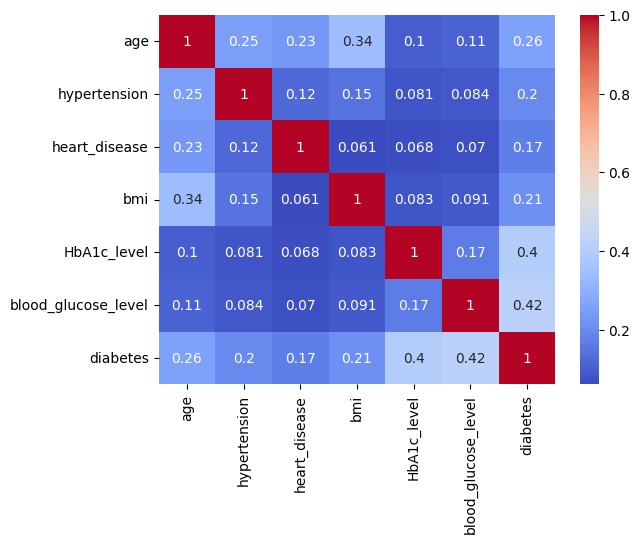

In [27]:
# Correlación entre variables
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [28]:
corr = df.corr(method = 'pearson').sort_values(by = 'diabetes', axis = 0).sort_values(by = 'diabetes', axis = 1)
corr

C:\Users\polga\AppData\Local\Temp\ipykernel_15896\1440953267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson').sort_values(by = 'diabetes', axis = 0).sort_values(by = 'diabetes', axis = 1)


,heart_disease,hypertension,bmi,age,HbA1c_level,blood_glucose_level,diabetes
heart_disease,1.000000,0.121262,0.061198,0.233254,0.067589,0.070066,0.171727
hypertension,0.121262,1.000000,0.147666,0.251093,0.080939,0.084429,0.197823
bmi,0.061198,0.147666,1.000000,0.337747,0.082997,0.091261,0.214357
age,0.233254,0.251093,0.337747,1.000000,0.101328,0.110631,0.257933
HbA1c_level,0.067589,0.080939,0.082997,0.101328,1.000000,0.166733,0.400660
blood_glucose_level,0.070066,0.084429,0.091261,0.110631,0.166733,1.000000,0.419558
diabetes,0.171727,0.197823,0.214357,0.257933,0.400660,0.419558,1.000000


<Axes: >

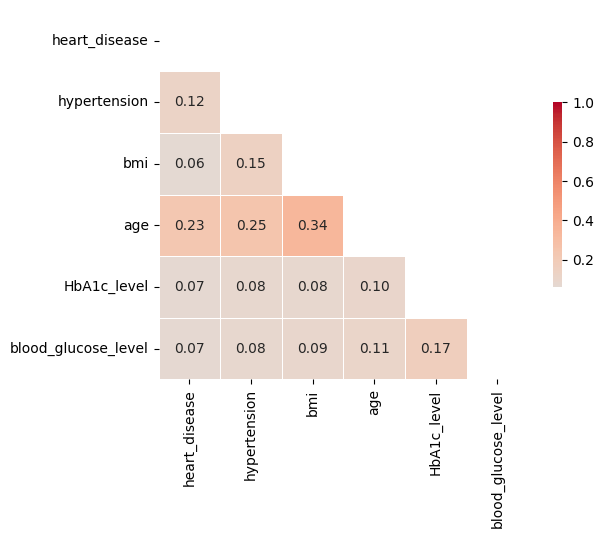

In [29]:
# Correlación sin variable diabetes
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots()
 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr.iloc[0:6,0:6], mask=mask[0:6,0:6], cmap="coolwarm", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True, fmt =".2f")

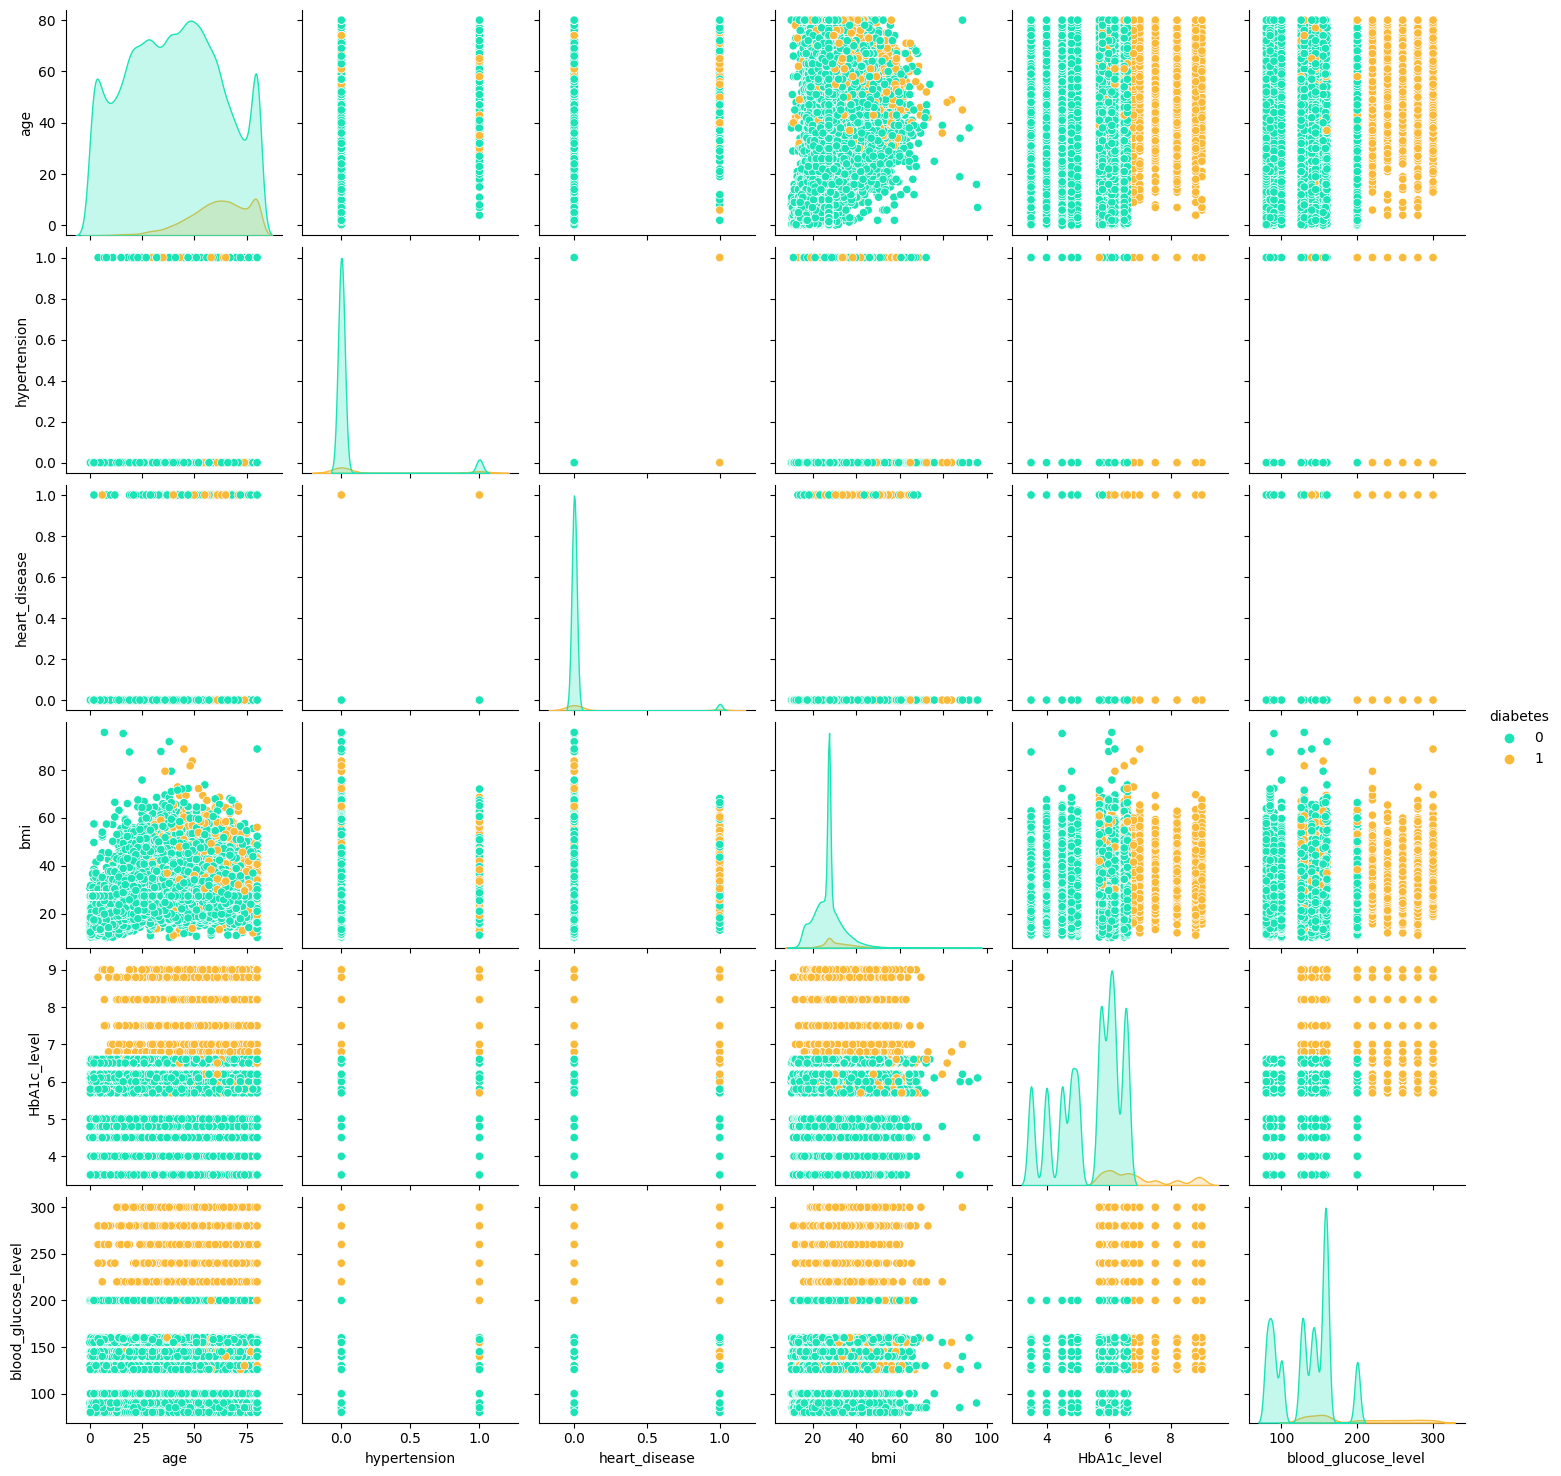

In [21]:
sns.pairplot(df,hue='diabetes',palette='turbo')
plt.show()

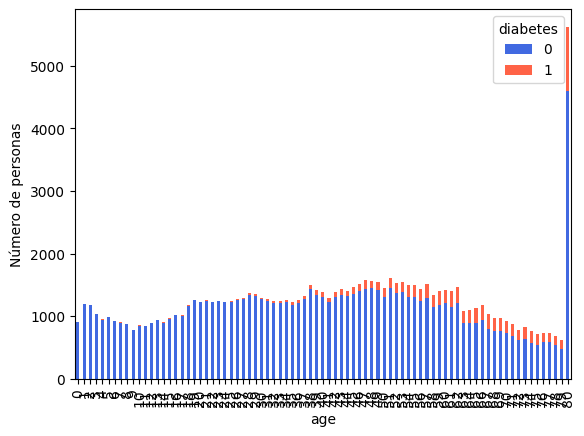

In [30]:
# Grafica por edad y si tienen diabetes
df.groupby(['age', 'diabetes']).size().unstack().plot(kind='bar', stacked=True, color = ['royalblue', 'tomato'])
plt.ylabel('Número de personas')
plt.show()

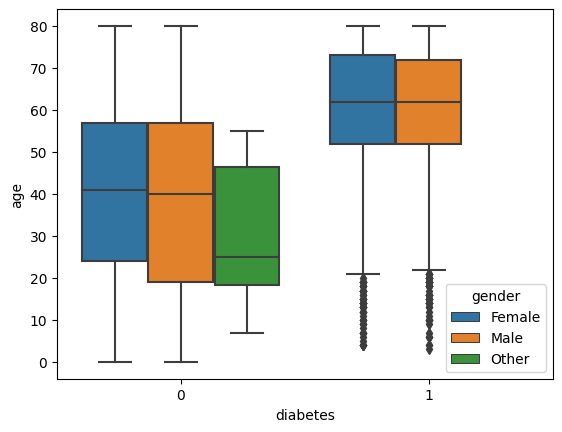

In [31]:
# Boxplot
sns.boxplot(data = df, x = 'diabetes', y = 'age', hue = 'gender')
plt.show()

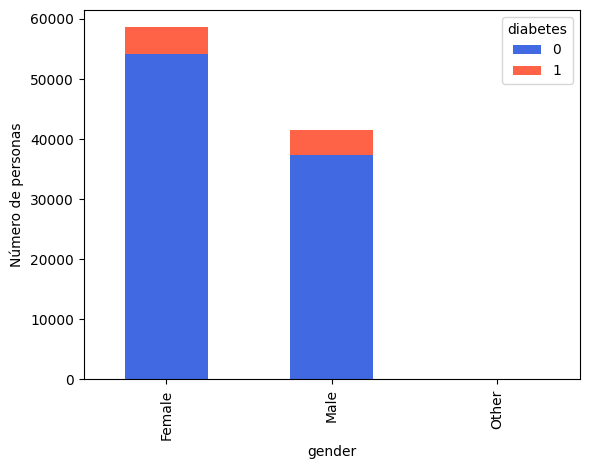

In [32]:
df.groupby(['gender', 'diabetes']).size().unstack().plot(kind='bar', stacked=True, color = ['royalblue', 'tomato'])
plt.ylabel('Número de personas')
plt.show()

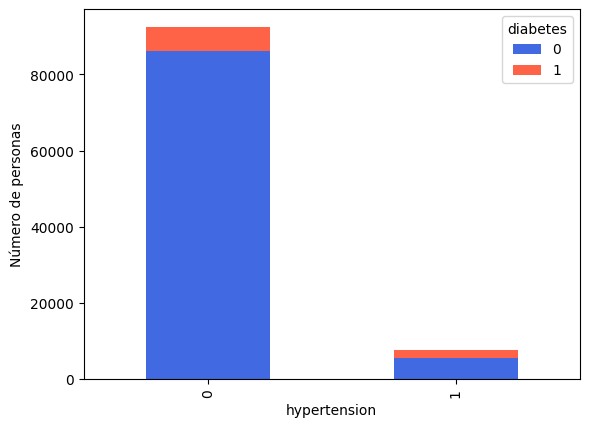

In [33]:
df.groupby(['hypertension', 'diabetes']).size().unstack().plot(kind='bar', stacked=True, color = ['royalblue', 'tomato'])
plt.ylabel('Número de personas')
plt.show()

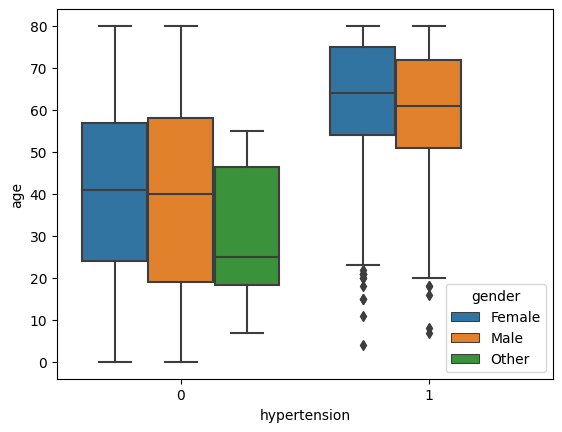

In [34]:
sns.boxplot(data = df, x = 'hypertension', y = 'age', hue = 'gender')
plt.show()

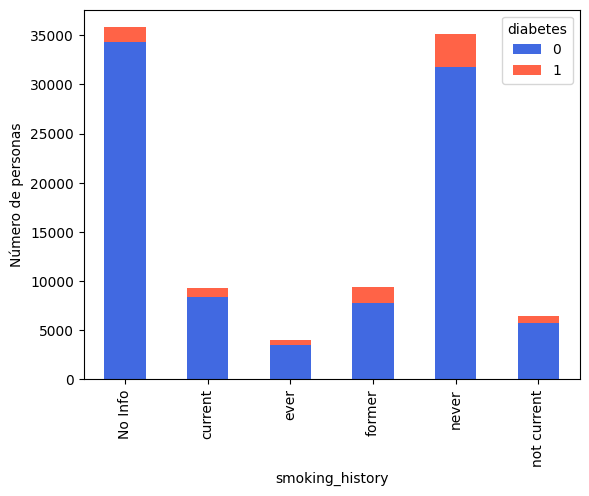

In [35]:
df.groupby(['smoking_history', 'diabetes']).size().unstack().plot(kind='bar', stacked=True, color = ['royalblue', 'tomato'])
plt.ylabel('Número de personas')
plt.show()

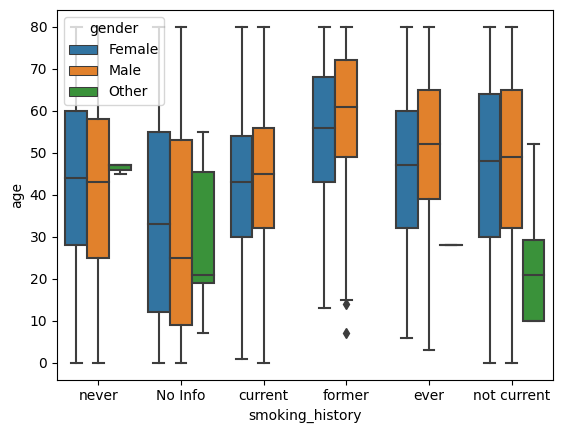

In [36]:
sns.boxplot(data = df, x = 'smoking_history', y = 'age', hue = 'gender')
plt.show()

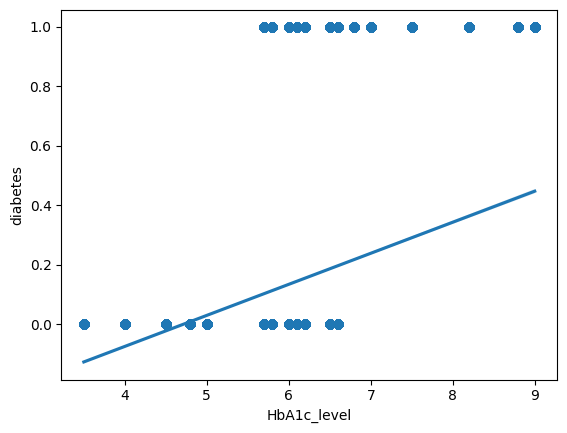

In [37]:
sns.regplot(x='HbA1c_level', y='diabetes', data=df)
plt.show()

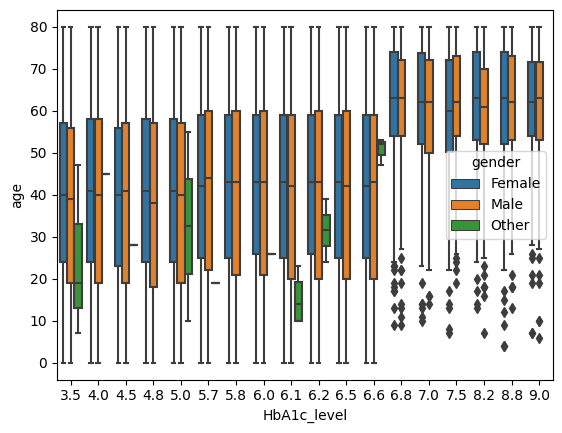

In [38]:
sns.boxplot(data = df, x = 'HbA1c_level', y = 'age', hue = 'gender')
plt.show()

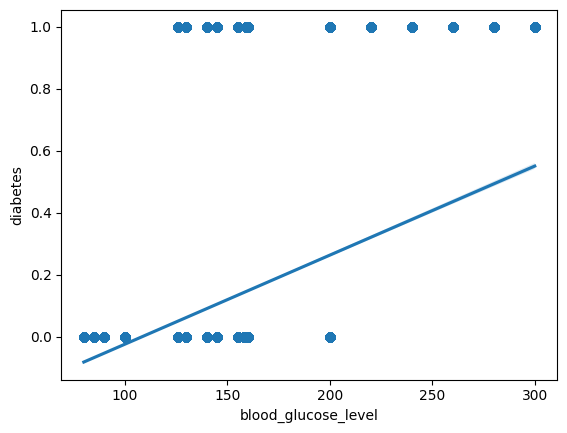

In [39]:
sns.regplot(x='blood_glucose_level', y='diabetes', data=df)
plt.show()

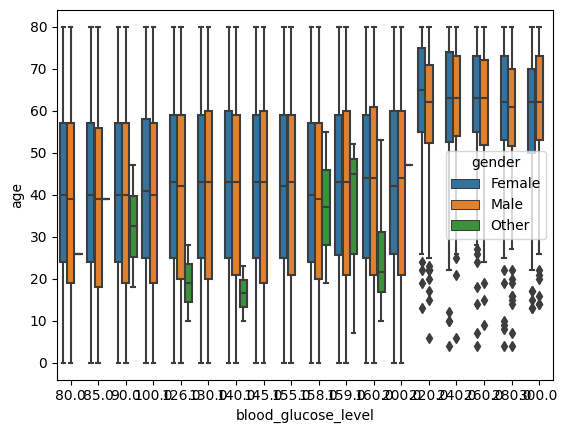

In [40]:
sns.boxplot(data = df, x = 'blood_glucose_level', y = 'age', hue = 'gender')
plt.show()

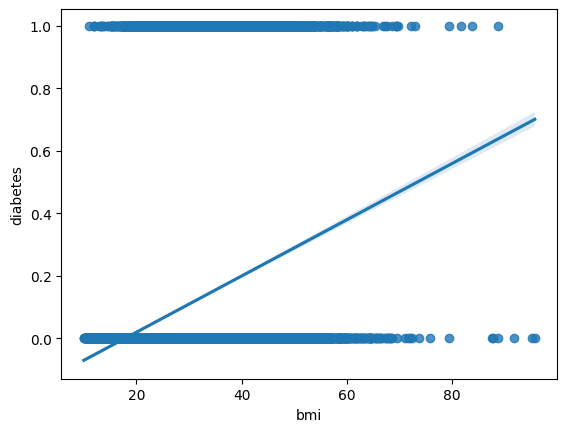

In [41]:
sns.regplot(x='bmi', y='diabetes', data=df)
plt.show()

### Estudio variables continuas

#### Visualizar normalizacion para ver que este en el intervalo [0,1]

In [42]:
df_copy = df.copy()

In [43]:
int_fn = lambda col: (col-min(col))/(max(col)-min(col))

<Axes: >

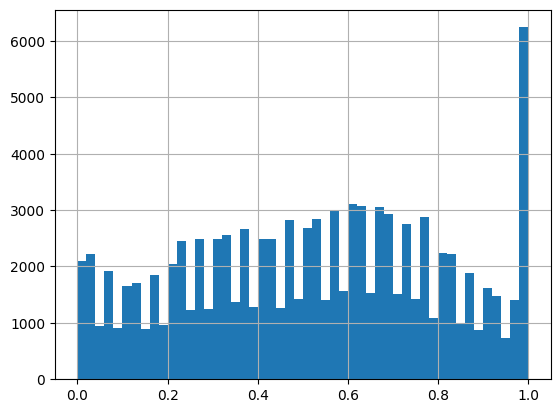

In [44]:
int_fn(df_copy['age']).hist(bins=50)

<Axes: >

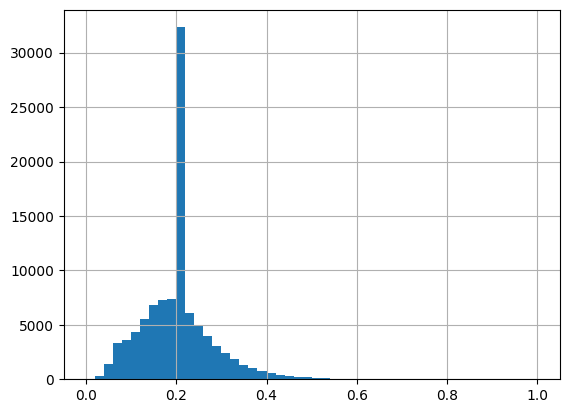

In [45]:
int_fn(df_copy['bmi']).hist(bins=50)

<Axes: >

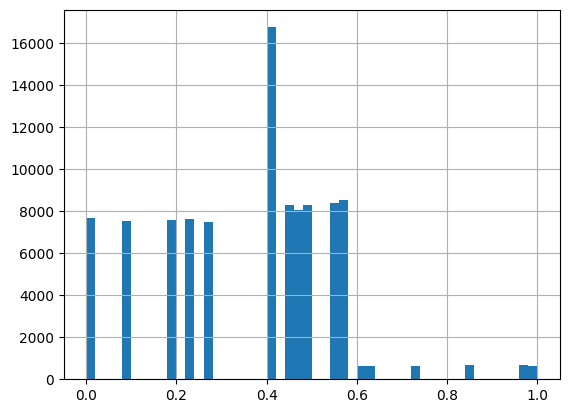

In [46]:
int_fn(df_copy['HbA1c_level']).hist(bins=50)

<Axes: >

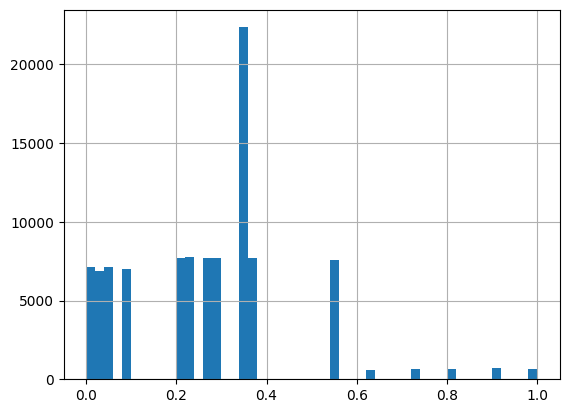

In [47]:
int_fn(df_copy['blood_glucose_level']).hist(bins=50)

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [50]:
# Convertir las columnas categóricas a valores numéricos 
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140.0,0
1,0,54,0,0,0,27.32,6.6,80.0,0
2,1,28,0,0,4,27.32,5.7,158.0,0
3,0,36,0,0,1,23.45,5.0,155.0,0
4,1,76,1,1,1,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,0,27.32,6.2,90.0,0
99996,0,2,0,0,0,17.37,6.5,100.0,0
99997,1,66,0,0,3,27.83,5.7,155.0,0
99998,0,24,0,0,4,35.42,4.0,100.0,0


In [ ]:
# Estandarizar las columnas numéricas. No lo aplico porque distorsiona el resulado de la predicción
'''scaler = StandardScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
df'''

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.691761,0,1,4,-0.321056,1.001706,0.047704,0
1,0,0.538015,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,-0.615730,0,0,4,-0.000116,0.161108,0.489878,0
3,0,-0.260731,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,1.514261,1,1,1,-1.081970,-0.679490,0.416183,0
...,...,...,...,...,...,...,...,...,...
99995,0,1.691761,0,0,0,-0.000116,0.628107,-1.180558,0
99996,0,-1.769475,0,0,0,-1.499343,0.908306,-0.934905,0
99997,1,1.070513,0,0,3,0.076729,0.161108,0.416183,0
99998,0,-0.793229,0,0,4,1.220361,-1.426688,-0.934905,0


In [51]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('diabetes', axis=1), df['diabetes'], test_size=0.5, random_state=30)

In [52]:
# Comparar modelos 
from pycaret.classification import *

setup = setup(data = df, target = 'diabetes')

best_model = compare_models()

,Description,Value
0,Session id,4953
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 9)"
4,Transformed data shape,"(100000, 9)"
5,Transformed train set shape,"(70000, 9)"
6,Transformed test set shape,"(30000, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9724,0.9791,0.6825,0.9888,0.8075,0.7932,0.8090,1.1360
lightgbm,Light Gradient Boosting Machine,0.9722,0.9786,0.6886,0.9776,0.8079,0.7934,0.8077,0.5540
ada,Ada Boost Classifier,0.9720,0.9789,0.6914,0.9702,0.8073,0.7926,0.8059,0.6830
xgboost,Extreme Gradient Boosting,0.9715,0.9775,0.6938,0.9596,0.8052,0.7903,0.8024,0.8910
rf,Random Forest Classifier,0.9707,0.9632,0.6871,0.9563,0.7996,0.7842,0.7967,0.8230
et,Extra Trees Classifier,0.9684,0.9577,0.6901,0.9172,0.7875,0.7708,0.7799,0.8150
lr,Logistic Regression,0.9601,0.9620,0.6269,0.8665,0.7274,0.7065,0.7173,0.8990
lda,Linear Discriminant Analysis,0.9563,0.9544,0.5876,0.8521,0.6954,0.6727,0.6863,0.5070
knn,K Neighbors Classifier,0.9523,0.8759,0.5171,0.8685,0.6480,0.6241,0.6485,0.6100
dt,Decision Tree Classifier,0.9521,0.8545,0.7361,0.7115,0.7235,0.6973,0.6975,0.4740


In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
# Crear y entrenar modelo
model_ada1 = AdaBoostClassifier()
model_ada1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=None)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Hacer y calcular predicción
y_pred = model_ada1.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45765
           1       0.97      0.68      0.80      4235

    accuracy                           0.97     50000
   macro avg       0.97      0.84      0.89     50000
weighted avg       0.97      0.97      0.97     50000



In [56]:
import pickle
# Guardar el modelo
with open('ada_model1.pkl', 'wb') as file:
    pickle.dump(model_ada1, file)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
model_grad1 = GradientBoostingClassifier()
model_grad1.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = model_grad1.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45765
           1       0.99      0.67      0.80      4235

    accuracy                           0.97     50000
   macro avg       0.98      0.83      0.89     50000
weighted avg       0.97      0.97      0.97     50000



In [60]:
import pickle
# Guardar el modelo
with open('gbc_model1.pkl', 'wb') as file:
    pickle.dump(model_ada1, file)